In [41]:
import sys,os
import numpy as np
from scripts.data_extraction import Data_extract
from scripts.data_cleaning_transformation import to_datatime,drop_duplicate,fill_missing_values,standard_scaler
from scripts.data_analysis import data_info,percent_missing,handset_manufacturer,top_handsets,total_ul_per_user,total_dl_per_user,total_data_vol,total_dur_per_user,mean_value,median_value,var_value,std_value,decile_value,plot_hist,plot_count,plot_bar,plot_heatmap,plot_box,plot_scatter,correlation_matrix,dem_reduction,plot_box_multi


data  = Data_extract()

sample = data.head(n=30)

In [38]:
data_info(sample)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 40 non-null     float64
 1   Start                                     40 non-null     object 
 2   Start ms                                  40 non-null     float64
 3   End                                       40 non-null     object 
 4   End ms                                    40 non-null     float64
 5   Dur. (ms)                                 40 non-null     float64
 6   IMSI                                      40 non-null     float64
 7   MSISDN/Number                             40 non-null     float64
 8   IMEI                                      40 non-null     float64
 9   Last Location Name                        40 non-null     object 
 10  Avg RTT DL (ms)                         

(None,
 ['Bearer Id',
  'Start',
  'Start ms',
  'End',
  'End ms',
  'Dur. (ms)',
  'IMSI',
  'MSISDN/Number',
  'IMEI',
  'Last Location Name',
  'Avg RTT DL (ms)',
  'Avg RTT UL (ms)',
  'Avg Bearer TP DL (kbps)',
  'Avg Bearer TP UL (kbps)',
  'TCP DL Retrans. Vol (Bytes)',
  'TCP UL Retrans. Vol (Bytes)',
  'DL TP < 50 Kbps (%)',
  '50 Kbps < DL TP < 250 Kbps (%)',
  '250 Kbps < DL TP < 1 Mbps (%)',
  'DL TP > 1 Mbps (%)',
  'UL TP < 10 Kbps (%)',
  '10 Kbps < UL TP < 50 Kbps (%)',
  '50 Kbps < UL TP < 300 Kbps (%)',
  'UL TP > 300 Kbps (%)',
  'HTTP DL (Bytes)',
  'HTTP UL (Bytes)',
  'Activity Duration DL (ms)',
  'Activity Duration UL (ms)',
  'Dur. (ms).1',
  'Handset Manufacturer',
  'Handset Type',
  'Nb of sec with 125000B < Vol DL',
  'Nb of sec with 1250B < Vol UL < 6250B',
  'Nb of sec with 31250B < Vol DL < 125000B',
  'Nb of sec with 37500B < Vol UL',
  'Nb of sec with 6250B < Vol DL < 31250B',
  'Nb of sec with 6250B < Vol UL < 37500B',
  'Nb of sec with Vol DL < 6250

In [3]:
percent_missing(data)

The dataset contains 12.5 % missing values.


In [91]:
data.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [5]:
to_datatime(data,'Start')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:00,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:00,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,2019-04-29 07:28:00,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [6]:
to_datatime(data,'End')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,2019-04-29 07:28:00,696.0,2019-04-30 10:40:00,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [7]:
drop_duplicate(data)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,2019-04-29 07:28:00,696.0,2019-04-30 10:40:00,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [90]:
columns = data.columns.values

for i in columns:
    fill_missing_values(data,i)



In [32]:
handset_manufacturer(data)

Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [33]:
top_handsets(data,'Apple')

Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [34]:
top_handsets(data,'Huawei')

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

In [35]:
top_handsets(data,'Samsung')

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [36]:
total_ul_per_user(data)

,MSISDN/Number,Total UL (Bytes)
0,3.360100e+10,36053108.0
1,3.360100e+10,36104459.0
2,3.360100e+10,39306820.0
3,3.360101e+10,20327526.0
4,3.360101e+10,94280527.0
...,...,...
106851,3.379000e+10,26716429.0
106852,3.379000e+10,35732243.0
106853,3.197021e+12,37295915.0
106854,3.370000e+14,56652839.0


In [37]:
total_dl_per_user(data)

,MSISDN/Number,Total DL (Bytes)
0,3.360100e+10,8.426375e+08
1,3.360100e+10,1.207552e+08
2,3.360100e+10,5.566597e+08
3,3.360101e+10,4.019932e+08
4,3.360101e+10,1.363130e+09
...,...,...
106851,3.379000e+10,6.879252e+08
106852,3.379000e+10,4.445751e+08
106853,3.197021e+12,1.948281e+08
106854,3.370000e+14,5.396350e+08


In [39]:
total_data_vol(data)

MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
                    ...     
3.379000e+10    7.146416e+08
3.379000e+10    4.803073e+08
3.197021e+12    2.321240e+08
3.370000e+14    5.962878e+08
8.823971e+14    1.391536e+08
Length: 106856, dtype: float64

In [40]:
total_dur_per_user(data)

,MSISDN/Number,Dur. (ms)
0,3.360100e+10,116720.0
1,3.360100e+10,181230.0
2,3.360100e+10,134969.0
3,3.360101e+10,49878.0
4,3.360101e+10,37104.0
...,...,...
106851,3.379000e+10,8810.0
106852,3.379000e+10,140988.0
106853,3.197021e+12,877385.0
106854,3.370000e+14,253030.0


In [41]:
mean_value(data)

c:\Users\User\Desktop\Telecom-data-analysis\scripts\data_analysis.py:61: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = data[num_list].mean()


Bearer Id                                   1.012045e+19
Start ms                                    4.991882e+02
End ms                                      4.988009e+02
Dur. (ms)                                   1.046084e+05
IMSI                                        2.082016e+14
MSISDN/Number                               4.182441e+10
IMEI                                        4.842592e+13
Avg RTT DL (ms)                             9.777445e+01
Avg RTT UL (ms)                             1.531503e+01
Avg Bearer TP DL (kbps)                     1.329996e+04
Avg Bearer TP UL (kbps)                     1.770417e+03
TCP DL Retrans. Vol (Bytes)                 8.915464e+06
TCP UL Retrans. Vol (Bytes)                 2.836918e+05
DL TP < 50 Kbps (%)                         9.288072e+01
50 Kbps < DL TP < 250 Kbps (%)              3.053926e+00
250 Kbps < DL TP < 1 Mbps (%)               1.708709e+00
DL TP > 1 Mbps (%)                          1.601563e+00
UL TP < 10 Kbps (%)            

In [42]:
median_value(data)

c:\Users\User\Desktop\Telecom-data-analysis\scripts\data_analysis.py:68: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median = data[num_list].median()


Bearer Id                                   7.349883e+18
Start ms                                    4.990000e+02
End ms                                      5.000000e+02
Dur. (ms)                                   8.639900e+04
IMSI                                        2.082015e+14
MSISDN/Number                               3.366371e+10
IMEI                                        3.572201e+13
Avg RTT DL (ms)                             4.500000e+01
Avg RTT UL (ms)                             5.000000e+00
Avg Bearer TP DL (kbps)                     6.300000e+01
Avg Bearer TP UL (kbps)                     6.300000e+01
TCP DL Retrans. Vol (Bytes)                 5.687300e+05
TCP UL Retrans. Vol (Bytes)                 2.094950e+04
DL TP < 50 Kbps (%)                         1.000000e+02
50 Kbps < DL TP < 250 Kbps (%)              0.000000e+00
250 Kbps < DL TP < 1 Mbps (%)               0.000000e+00
DL TP > 1 Mbps (%)                          0.000000e+00
UL TP < 10 Kbps (%)            

In [43]:
var_value(data)

c:\Users\User\Desktop\Telecom-data-analysis\scripts\data_analysis.py:75: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var = data[num_list].var()


Bearer Id                                   8.366197e+36
Start ms                                    8.329624e+04
End ms                                      8.299970e+04
Dur. (ms)                                   6.567055e+09
IMSI                                        4.599835e+20
MSISDN/Number                               5.947411e+24
IMEI                                        5.011953e+26
Avg RTT DL (ms)                             3.134986e+05
Avg RTT UL (ms)                             5.881049e+03
Avg Bearer TP DL (kbps)                     5.746483e+08
Avg Bearer TP UL (kbps)                     2.139379e+07
TCP DL Retrans. Vol (Bytes)                 1.384346e+16
TCP UL Retrans. Vol (Bytes)                 2.490123e+14
DL TP < 50 Kbps (%)                         1.693918e+02
50 Kbps < DL TP < 250 Kbps (%)              3.848206e+01
250 Kbps < DL TP < 1 Mbps (%)               1.722954e+01
DL TP > 1 Mbps (%)                          2.321393e+01
UL TP < 10 Kbps (%)            

In [44]:
std_value(data)

Bearer Id                                       2892437846624005632.0
Start                                       1 days 17:04:14.738675987
Start ms                                                   288.610872
End                                         1 days 18:20:14.279074523
End ms                                                     288.096693
Dur. (ms)                                                81037.364992
IMSI                                               21447225377.498249
MSISDN/Number                                    2438731368208.414551
IMEI                                            22387392564342.789062
Avg RTT DL (ms)                                            559.909444
Avg RTT UL (ms)                                             76.687998
Avg Bearer TP DL (kbps)                                     23971.823
Avg Bearer TP UL (kbps)                                   4625.342183
TCP DL Retrans. Vol (Bytes)                          117658237.107206
TCP UL Retrans. Vol 

In [47]:
data['dec'] = decile_value(data)
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),dec
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0,8
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0,8
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0,8
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0,8
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0,3
149997,7.349883e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0,5
149998,1.311448e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0,5
149999,1.311448e+19,2019-04-29 07:28:00,696.0,2019-04-30 10:40:00,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0,5


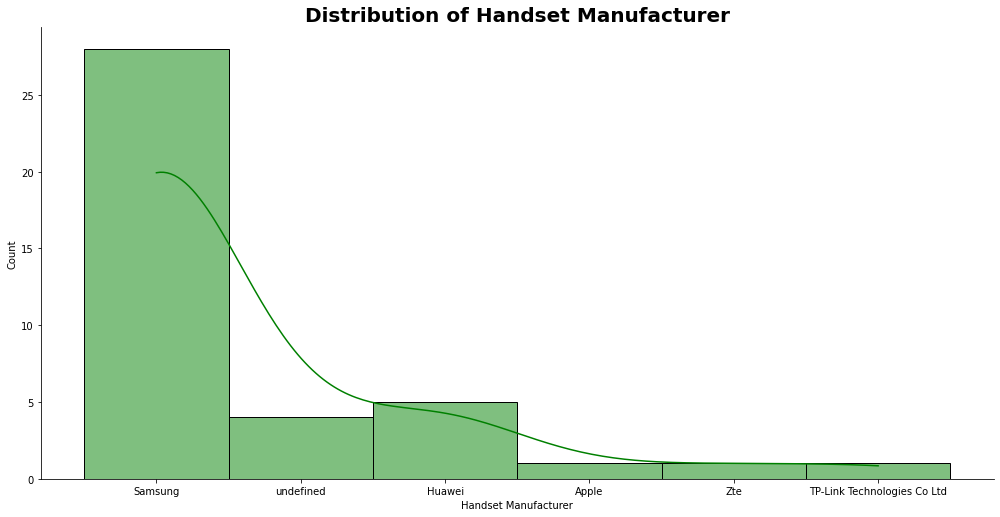

In [50]:
plot_hist(sample,'Handset Manufacturer','green')

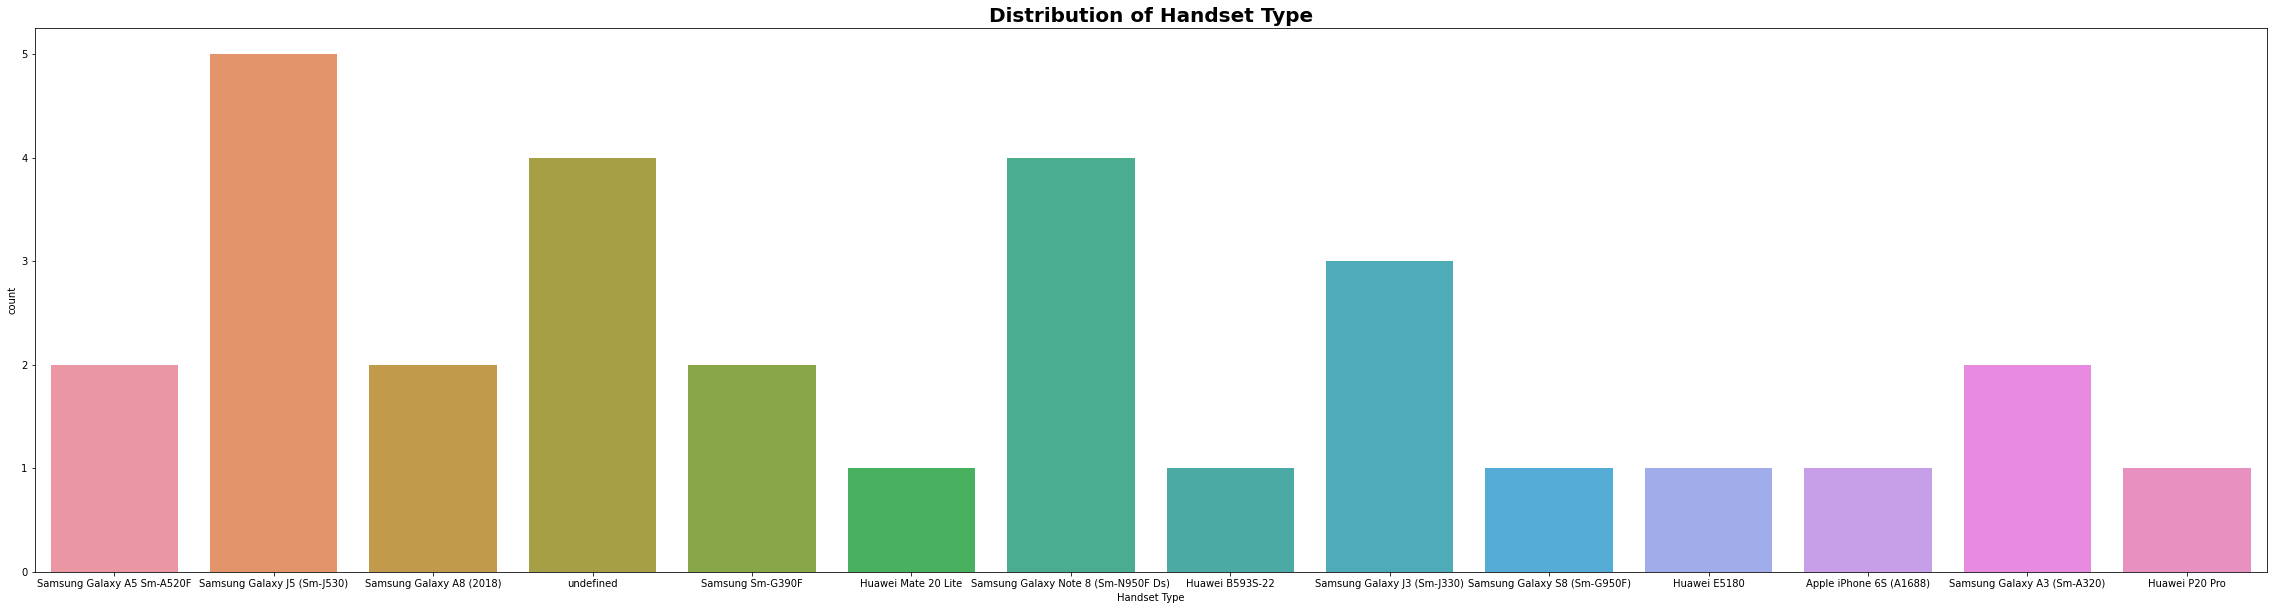

In [2]:
plot_count(sample,'Handset Type')

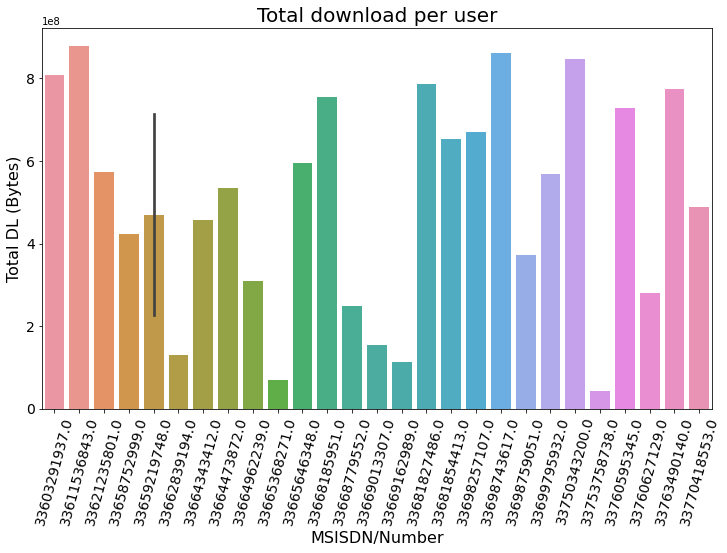

In [4]:
plot_bar(sample,'MSISDN/Number','Total DL (Bytes)','Total download per user','MSISDN/Number','Total DL (Bytes)')

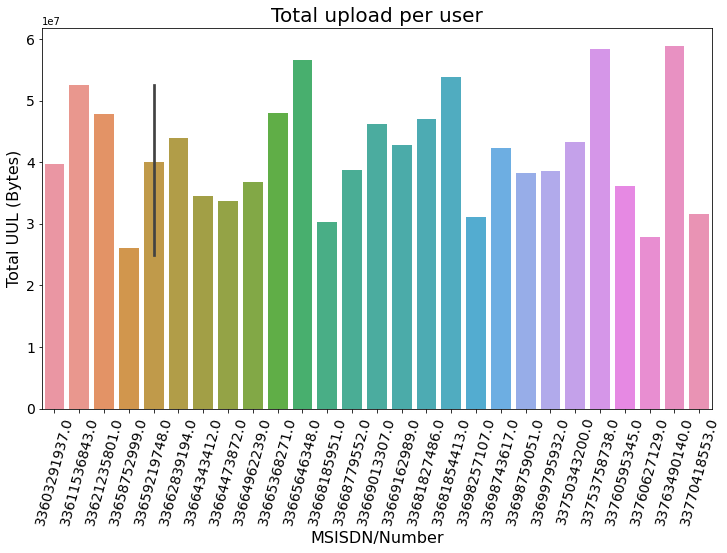

In [5]:
plot_bar(sample,'MSISDN/Number','Total UL (Bytes)','Total upload per user','MSISDN/Number','Total UUL (Bytes)')

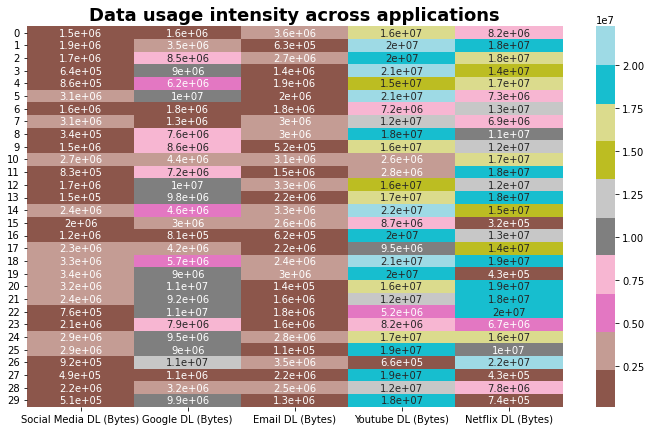

In [3]:
plot_heatmap(sample[['Social Media DL (Bytes)','Google DL (Bytes)','Email DL (Bytes)','Youtube DL (Bytes)','Netflix DL (Bytes)']],'Data usage intensity across applications')

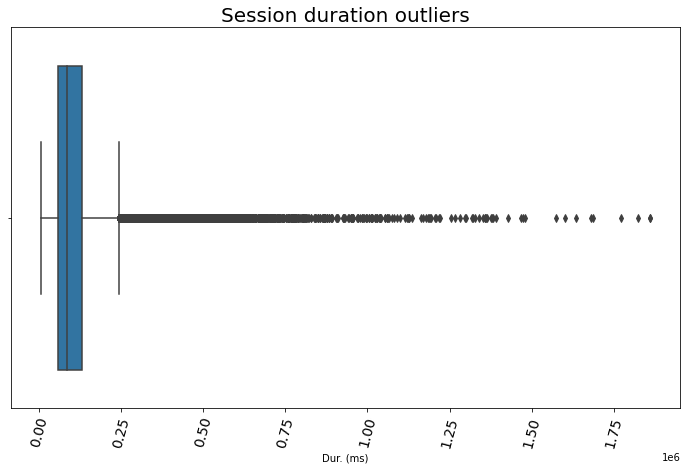

In [4]:
plot_box(data,'Dur. (ms)','Session duration outliers')

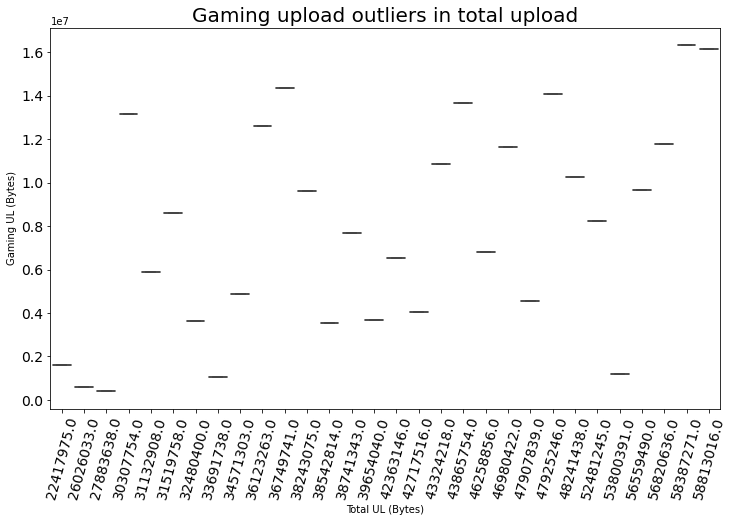

In [2]:
plot_box_multi(sample,'Total UL (Bytes)','Gaming UL (Bytes)','Gaming upload outliers in total upload')

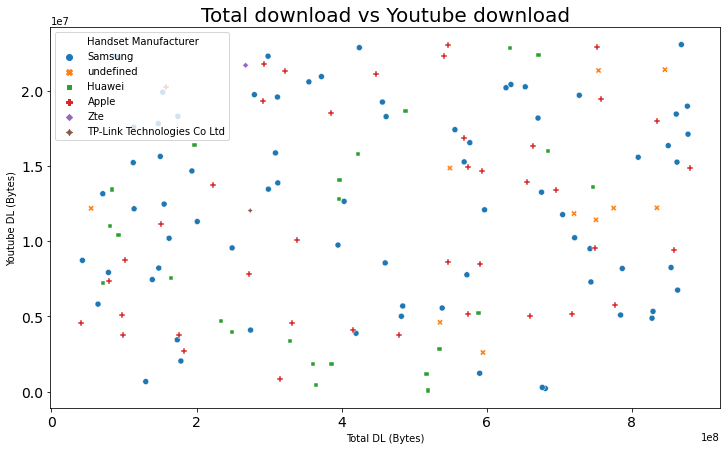

In [6]:
plot_scatter(data.head(n=150),'Total DL (Bytes)','Youtube DL (Bytes)','Total download vs Youtube download','Handset Manufacturer','Handset Manufacturer')

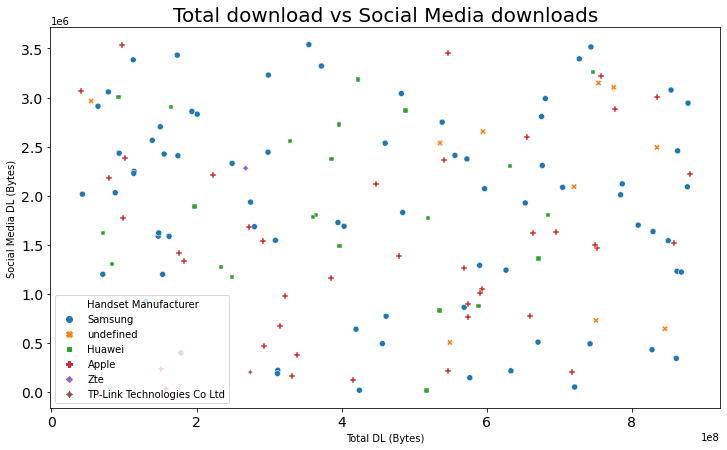

In [7]:
plot_scatter(data.head(n=150),'Total DL (Bytes)','Social Media DL (Bytes)','Total download vs Social Media downloads','Handset Manufacturer','Handset Manufacturer')

In [8]:
correlation_matrix(data[['Social Media DL (Bytes)','Google DL (Bytes)','Email DL (Bytes)','Youtube DL (Bytes)','Netflix DL (Bytes)']])

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes)
Social Media DL (Bytes),1.000000,-0.001954,0.004745,-0.001389,-0.001817
Google DL (Bytes),-0.001954,1.000000,-0.000039,0.001760,0.000548
Email DL (Bytes),0.004745,-0.000039,1.000000,0.001679,0.001351
Youtube DL (Bytes),-0.001389,0.001760,0.001679,1.000000,0.001202
Netflix DL (Bytes),-0.001817,0.000548,0.001351,0.001202,1.000000


In [89]:
testing = data.select_dtypes(include=['float64'])
stand = standard_scaler(testing)

In [4]:
dem_reduction(stand)

(              0         1          2         3         4          5   \
 0      -3.869795  2.711685  21.922604 -0.005500  0.490005  15.272089   
 1      -3.159000  2.001511  16.100812 -0.564699 -2.250719  11.080589   
 2      -3.179133  2.034191  16.096360 -0.251037  1.647758  11.130127   
 3      -3.147089  1.950515  15.542431 -2.184163 -1.603715  10.756258   
 4      -2.788424  1.616085  12.629627 -0.986050 -0.250489   8.709651   
 ...          ...       ...        ...       ...       ...        ...   
 149996 -1.421725  0.177725  -0.234196  0.413498 -2.153544  -0.305433   
 149997 -1.445682  0.213938  -0.016284 -1.175149 -0.395269  -0.121496   
 149998 -1.373185  0.182641   0.094833 -1.083640  0.310395  -0.147867   
 149999 -0.982660  0.033033   0.315825 -0.291821  1.503841  -0.496301   
 150000 -1.420493  0.191976  -0.125033  0.016613 -0.003434  -0.223199   
 
               6         7         8         9   ...        40        41  \
 0      -9.840253 -0.170458 -3.949256  6.70710